begin to train
learning rate alpha:0.100000
number of rounds:100

origin train loss:292.675149
origin validation loss:309.533431

final train loss:12.217249
final validation loss:14.703547


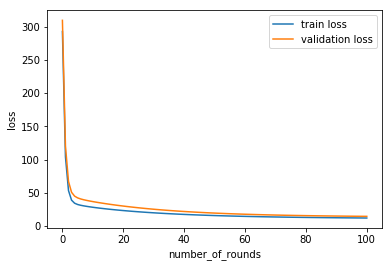

In [9]:
%matplotlib inline
# write your code here# -*- coding: utf-8 -*-
from sklearn import datasets
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt

def loss(X,y,w):
    m = y.shape[0]
    return 0.5*(((y-X*w).T*(y-X*w))).sum()/m

def gradient(X,y,w):
    return X.T*(X*w-y)
    
def gradientDecent(X,y,w,alpha,num_rounds,val_x,val_y):
    m = y.shape[0]
    train_loss_history = []
    val_loss_history = []
    print("origin train loss:%f"%loss(X,y,w))
    train_loss_history.append(loss(X,y,w))
    print("origin validation loss:%f"%loss(val_x,val_y,w))
    val_loss_history.append(loss(val_x,val_y,w))
    print("")
    
    for i in range(num_rounds):
        w = w - gradient(X,y,w)*alpha/m
        train_loss_history.append(loss(X,y,w))
        val_loss_history.append(loss(val_x,val_y,w))
        
    return w,train_loss_history,val_loss_history

def train(X,y,val_x,val_y):
    m = X.shape[1]
    init_w = np.matrix(np.zeros(m)).T
    print("begin to train")
    alpha=0.1
    num_rounds=100
    print("learning rate alpha:%f"%alpha)
    print("number of rounds:%d"%num_rounds)
    print("")
    w,train_loss_history,val_loss_history = gradientDecent(X,y,init_w,alpha,num_rounds,val_x,val_y)
    plt.plot(np.arange(num_rounds+1),train_loss_history,label='train loss')
    plt.plot(np.arange(num_rounds+1),val_loss_history,label='validation loss')
    plt.legend(loc=1)
    plt.xlabel('number_of_rounds')
    plt.ylabel('loss')
    return w,train_loss_history,val_loss_history
    

def getData():
    X,y = datasets.load_svmlight_file('./housing_scale',n_features=13)
    X = np.matrix(X.toarray())
    ones = np.matrix(np.ones((X.shape[0],1)))
    X = np.concatenate((ones,X),axis=1)
    y = np.matrix(y).T
    train_x,test_x,train_y,test_y = model_selection.train_test_split(X,y,test_size=0.2,random_state=123)   
    return train_x,test_x,train_y,test_y
    

train_x,test_x,train_y,test_y = getData()
w,train_loss,val_loss = train(train_x,train_y,test_x,test_y)
print("final train loss:%f"%train_loss.pop())
print("final validation loss:%f"%val_loss.pop())



